In [1]:
%matplotlib inline
from ROOT import TFile, TTree
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
from root_numpy import root2array

In [45]:
filebase = '/Users/davidkaleko/larlite/UserDev/LowEnergyExcess/scripts/'
#This is the file that comes out of singleE_LEE_selection.py
filename = 'singleE_LEE_selection_mc.root'

treename = 'LEETree'
binning = np.linspace(0,3000,30)

plot_variable = '_e_dep' #_e_dep #_e_nuReco
#17 cm from all sides
fidvolcut = '_x_vtx > 17. and _x_vtx < 239. and _y_vtx < 99. and _y_vtx > -99. and _z_vtx > 17. and _z_vtx < 1019.'

In [46]:
df = pd.DataFrame( root2array( filebase + filename, treename ) )

In [59]:
print df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5735 entries, 0 to 5734
Data columns (total 21 columns):
_numEvts            5735 non-null int32
_is_fiducial        5735 non-null bool
_e_nuReco           5735 non-null float64
_e_dep              5735 non-null float64
_weight             5735 non-null float64
_parentPDG          5735 non-null int32
_mcPDG              5735 non-null int32
_mcGeneration       5735 non-null int32
_longestTrackLen    5735 non-null float64
_x_vtx              5735 non-null float64
_y_vtx              5735 non-null float64
_z_vtx              5735 non-null float64
_e_theta            5735 non-null float64
_e_phi              5735 non-null float64
_nu_theta           5735 non-null float64
_nu_pt              5735 non-null float64
_nu_p               5735 non-null float64
_n_children         5735 non-null int32
_is_simple          5735 non-null bool
_dedx               5735 non-null float64
_flash_time         5735 non-null float64
dtypes: bool(2), float64(14

In [53]:
fuck   = np.array(df.query(fidvolcut)[plot_variable])
mylife = np.array(df.query(fidvolcut)['_weight'])

(4446,)
(4446,)


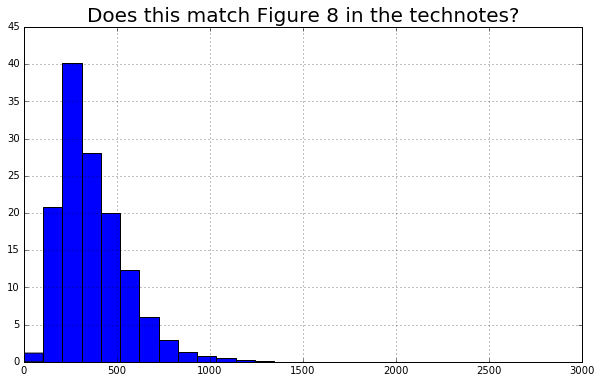

In [56]:
plt.figure(figsize=(10,6))
hist, bins, idkwhatthisis = plt.hist(fuck,bins=binning,weights=mylife)
plt.title("Does this match Figure 8 in the technote?",fontsize=20)
plt.xlabel('True Lepton Energy (smeared))')
plt.grid(True)

In [62]:
print "Integral of the above histogram = %0.2f, including %0.2f underflow and %0.2f overflow."%(np.sum(hist),hist[0],hist[-1])

Integral of the above histogram = 134.54, including 1.17 underflow and 0.00 overflow.
